493, Anton Karazeev, anton.karazeev@phystech.edu

In [5]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1.1 Ответы в листьях регрессионного дерева

Что лучше - отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (все объекты равновероятны)?

-- -- --

Обозначения: $y_i$ - истинные значения таргетов, $\hat y_i$ - предсказанные значения таргетов.

В первом случае: предсказанные таргеты - это среднее значение $\bar y$.

- Считаю мат. ож. MSE: $\mathbb E MSE(Y,\hat Y) = \frac{1}{n} \sum_i E (y_i - \hat y_i)^2 = \frac{1}{n} \sum_i Ey_i^2 + E\hat y_i^2 - 2y_i \bar y = \frac{1}{n} \sum_i y_i^2 + \left(\frac{\sum_j y_j}{n}\right)^2 - 2y_i \bar y$, в этом случае $y_i$ является фиксированным числом.

Во втором случае: предсказанные таргеты - случайная величина с равномерным распределением: $\hat y \sim Uniform$.

- Считаю мат. ож. MSE: $\mathbb E MSE(Y,\hat Y) = \frac{1}{n} \sum_i Ey_i^2 + E\hat y_i^2 - 2y_i \bar y = \frac{1}{n} \sum_i y_i^2 + \frac{\sum_j y_j^2}{n} - 2y_i \bar y$, т.к. $\mathbb E \hat y = \bar y.$

Получаю, что ошибка во втором случае больше, чем в первом, т.к. $\frac{\sum_j y_j^2}{n} \geqslant \left(\frac{\sum_j y_j}{n}\right)^2$ (поскольку выборочная дисперсия $\geqslant 0$).

Следовательно, лучше отвечать средним значением таргета на объектах обучающей выборки.

# 1.2 Линейные модели в деревьях

На лекции разбирался алгоритм построения дерева. "Качество" разбиения измерялось при помощи функции неоднородности:

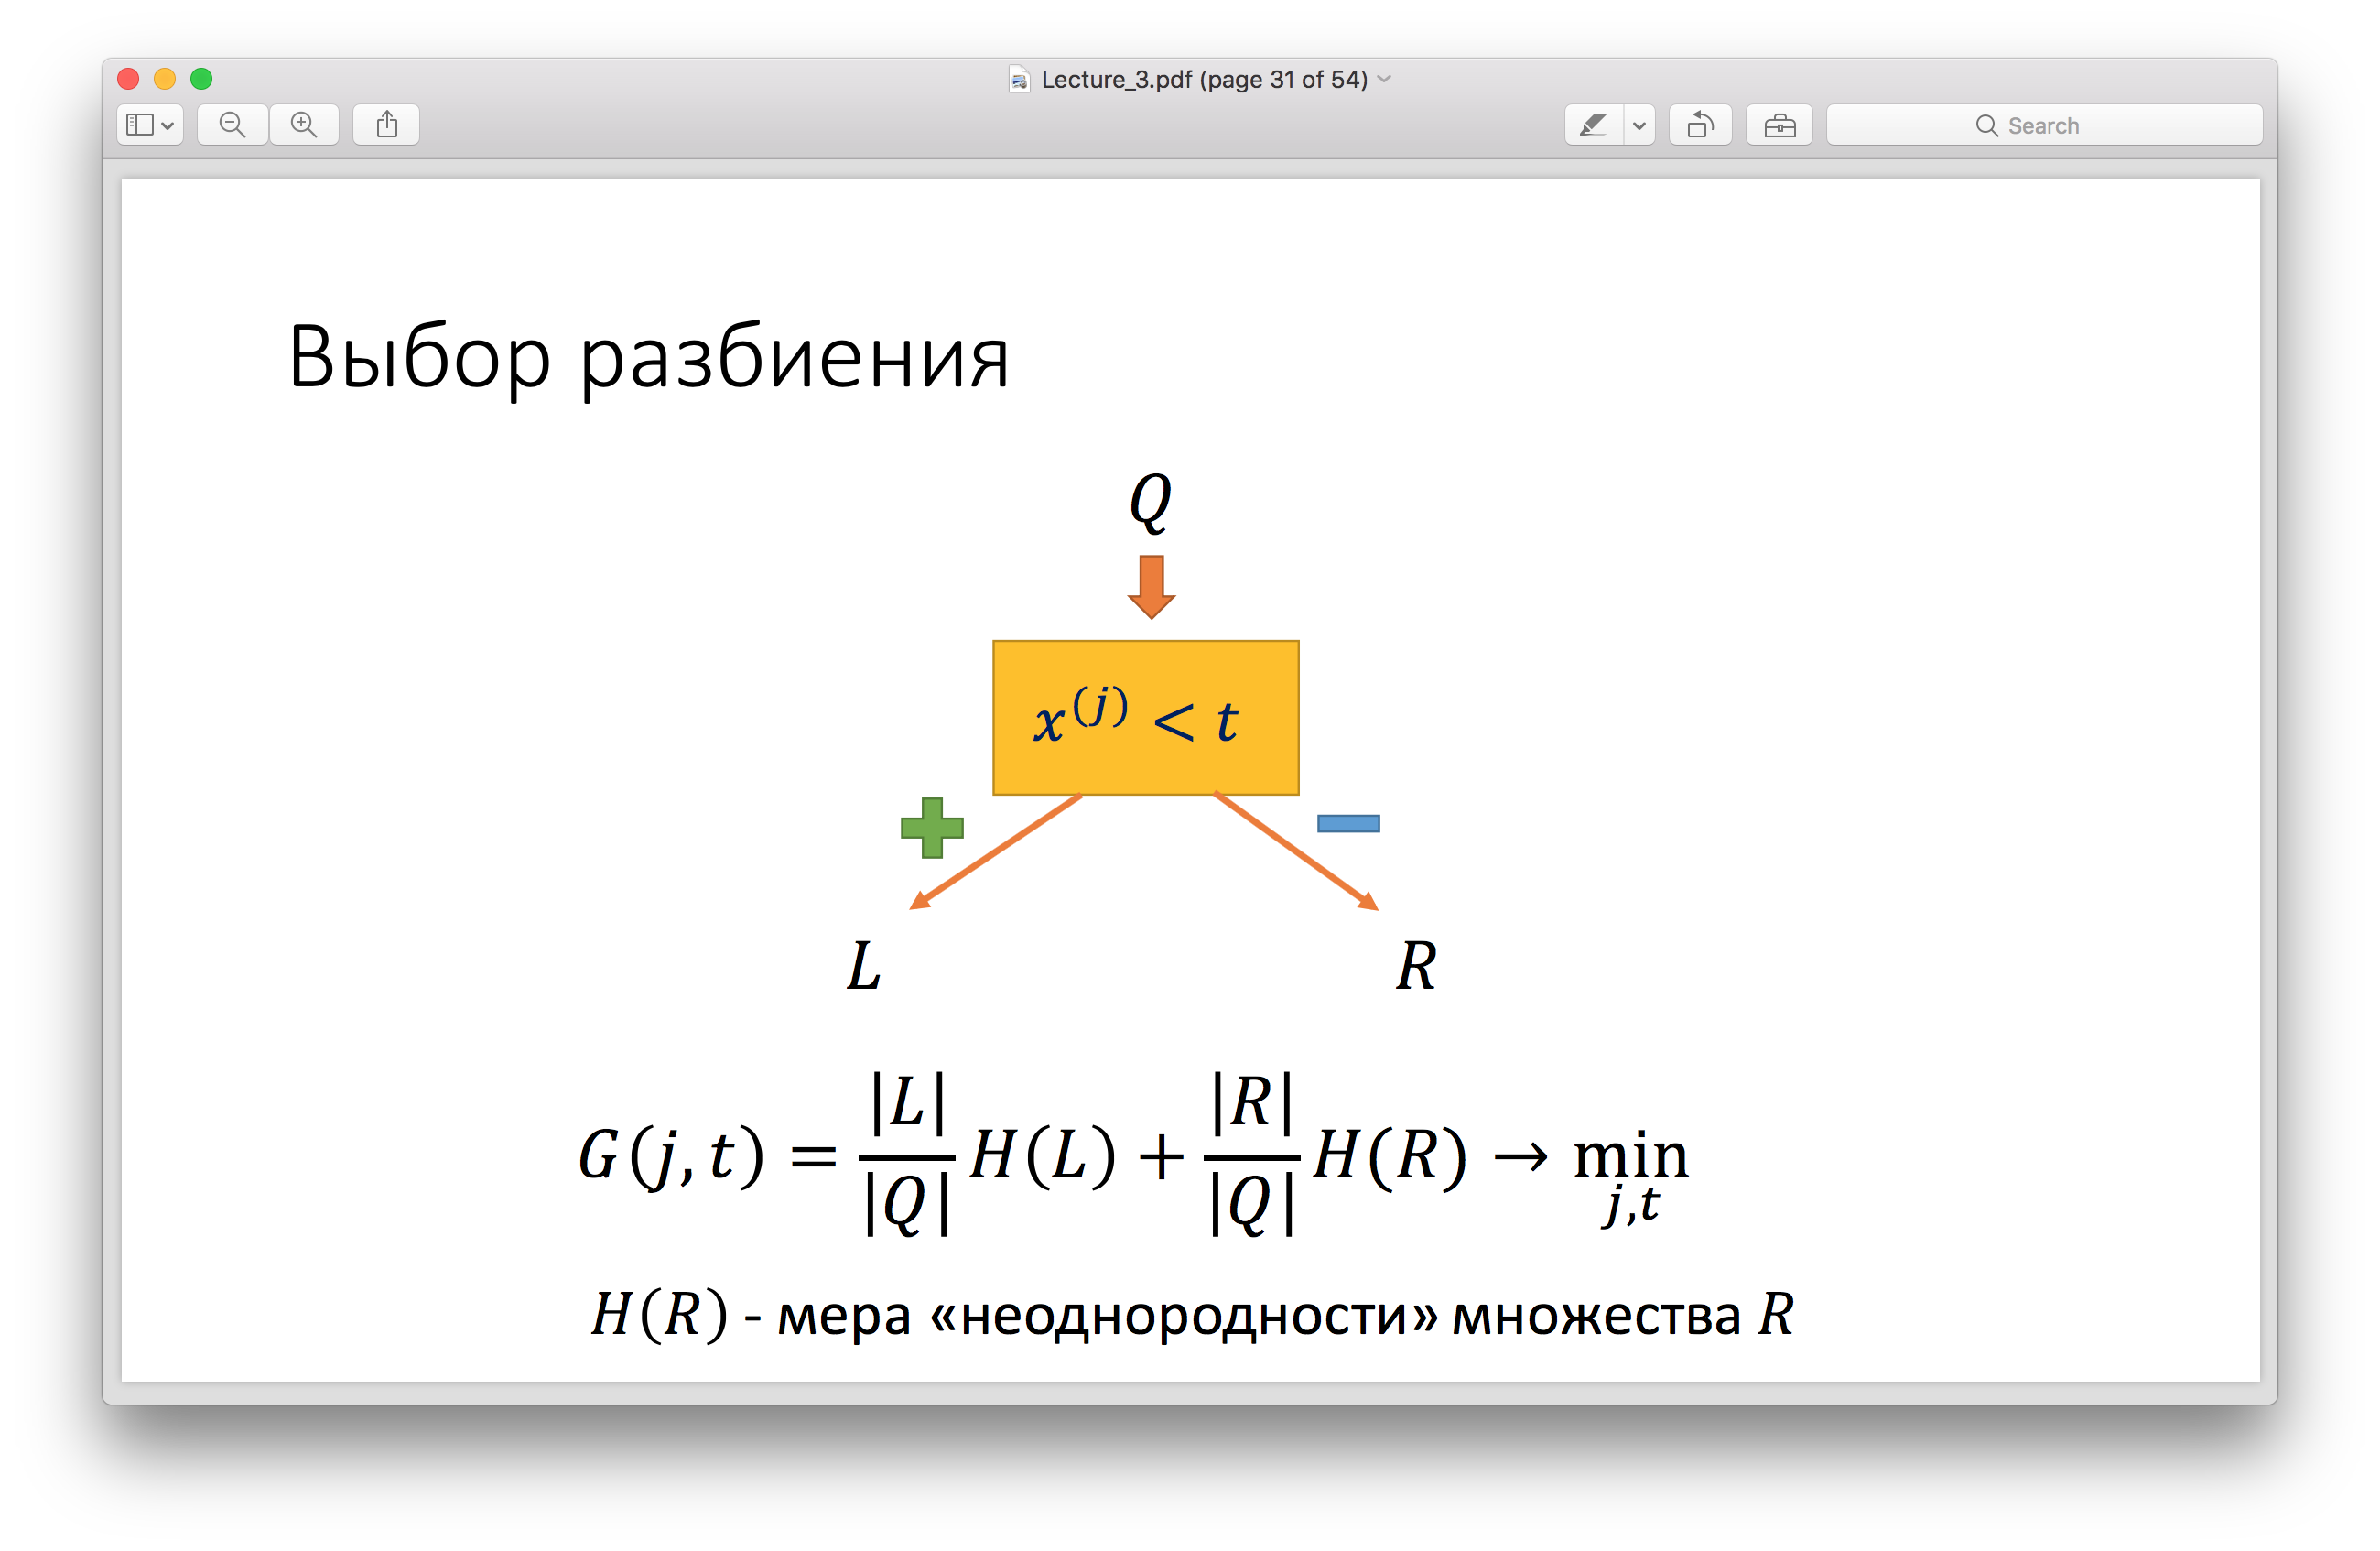

In [6]:
Image('fig1.png', width=600, height=600)

Линейная регрессия предполагает линейную зависимость данных. Вернее, она лучше всего подходит для данных, которые имеют линейную зависимость. В общем виде это не так. Поэтому "такая стратегия не даёт ощутимого выигрыша".

Модифицировать построение разбиений в дереве по MSE можно следующим образом:

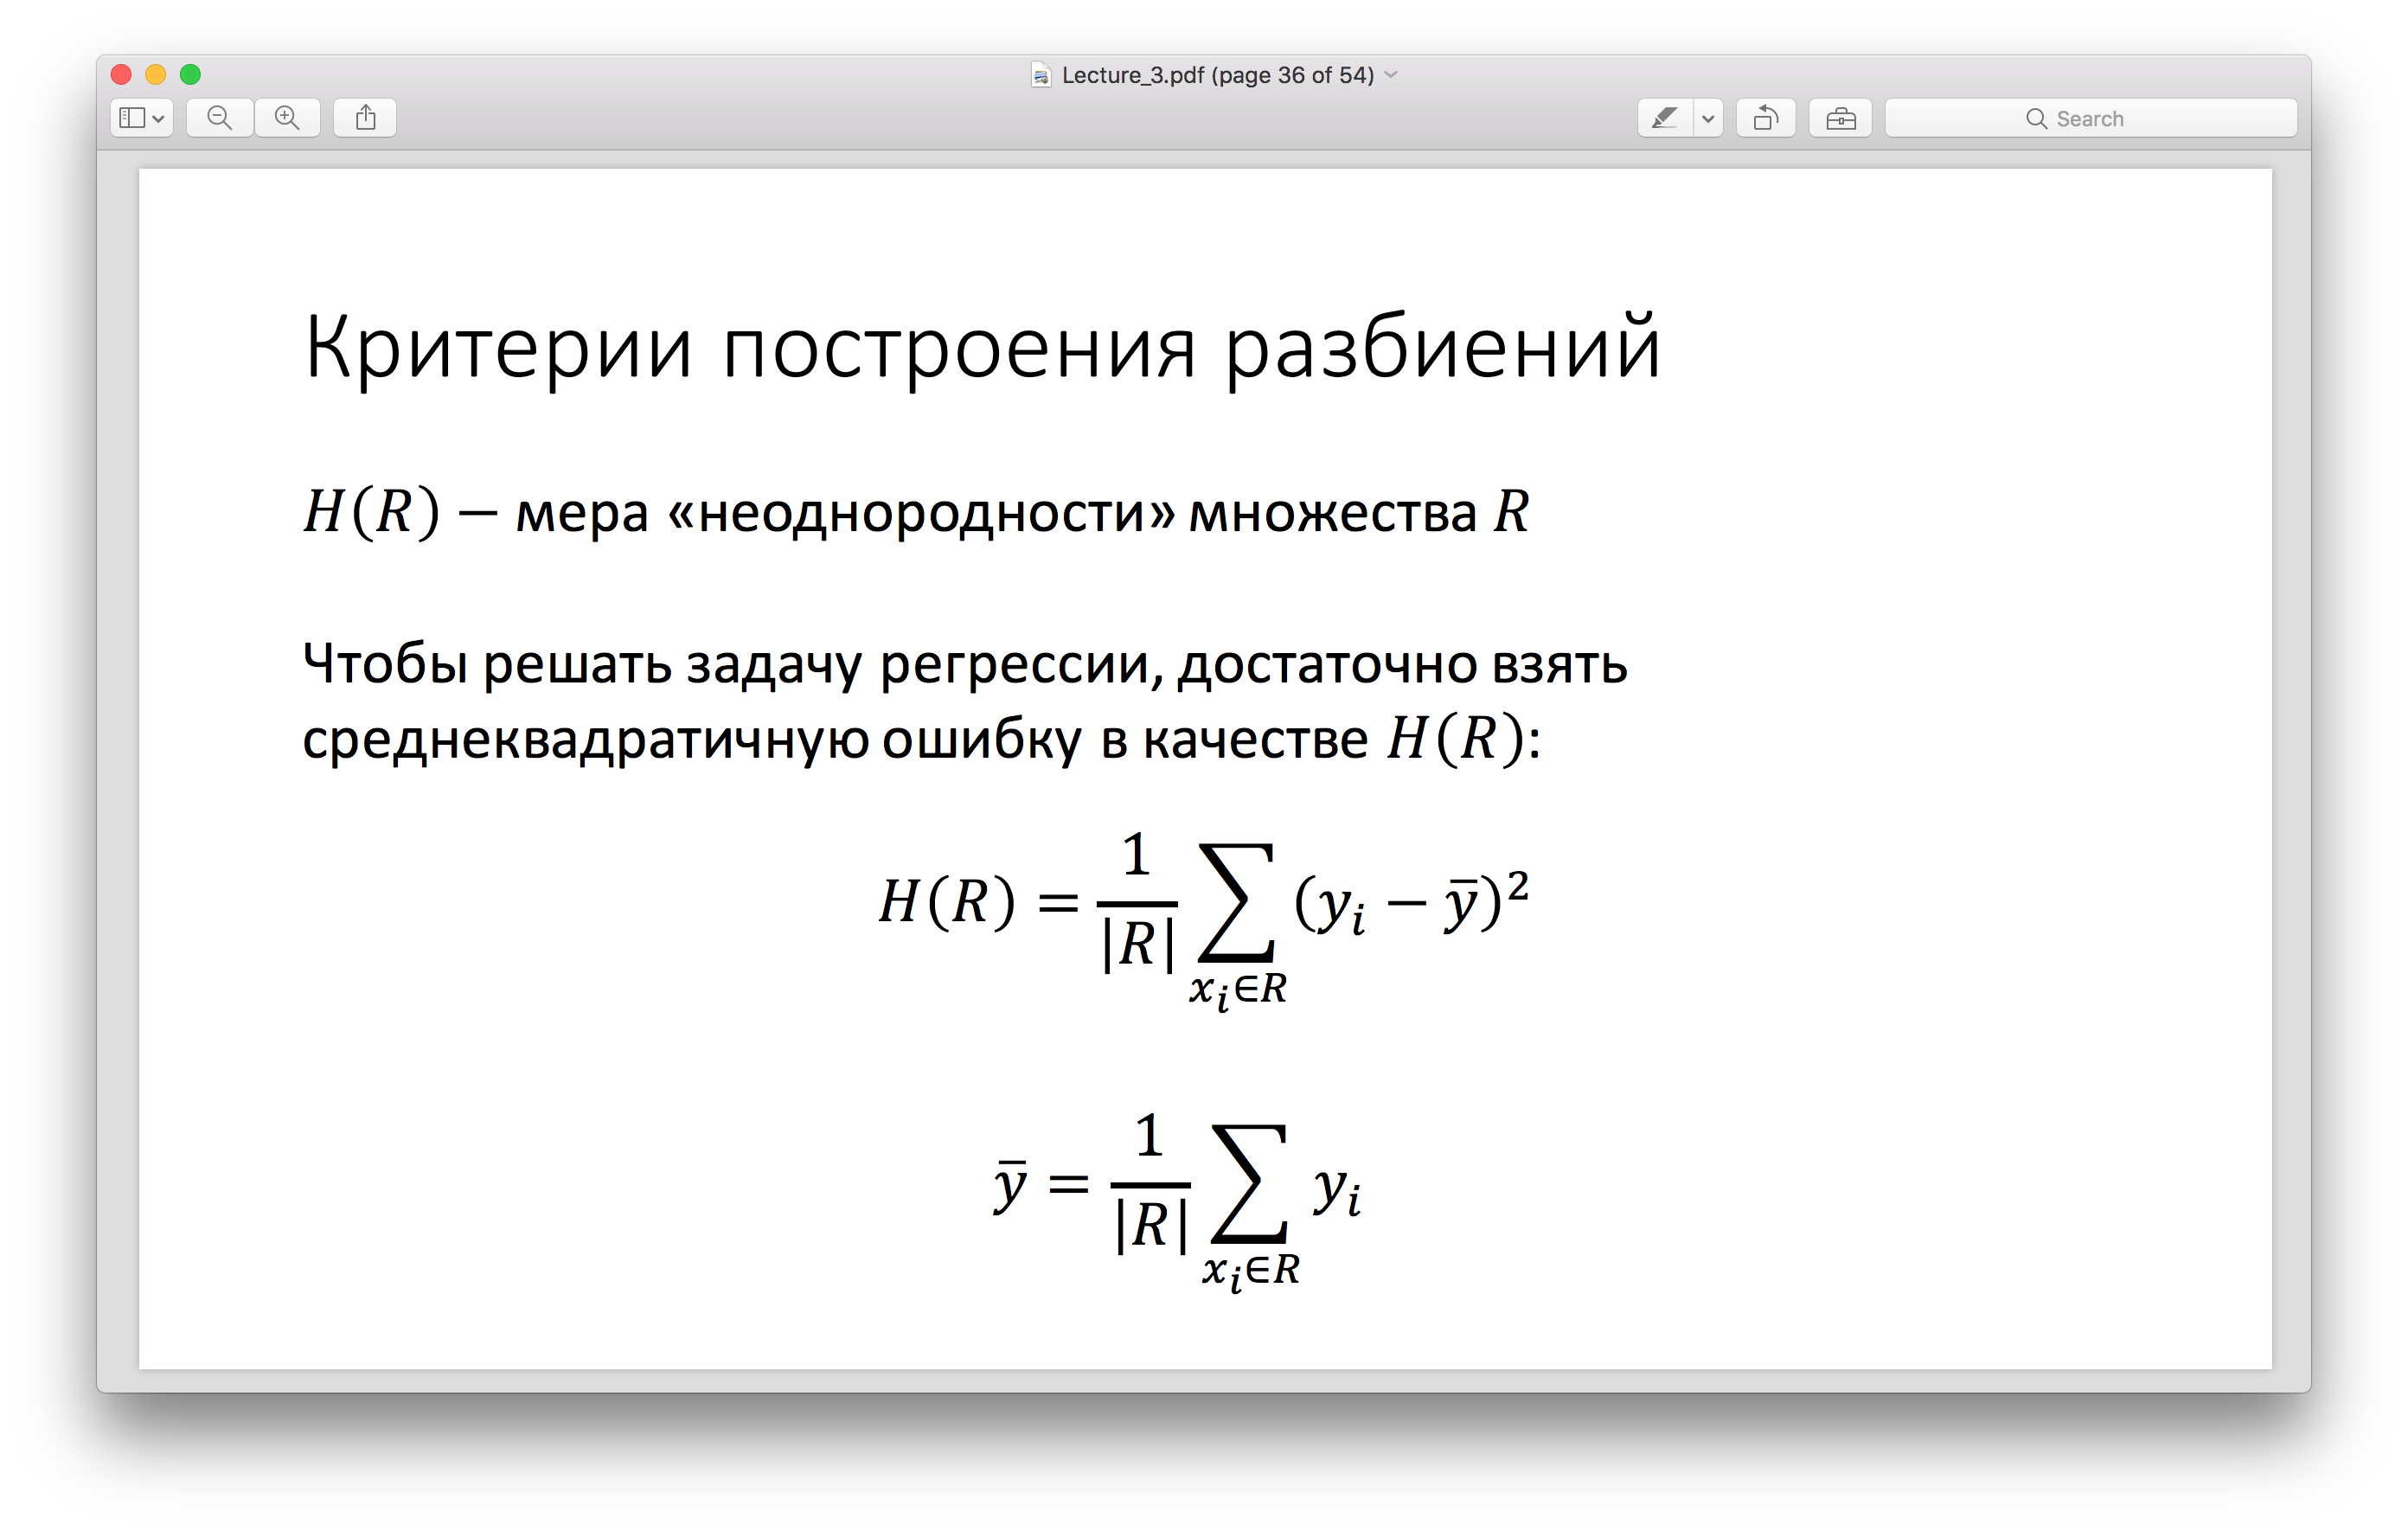

In [8]:
Image('fig2.png', width=600, height=600)

И подставить эту функцию H(R) в Q(j,t).